# AMLT Project - Breast cancer dataset

In this dataset, diagnosis column has two types - malignant (cancerous) and benign (non-cancerous)

We are encoding malignant as 1 and benign as 0


# Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd=pd.read_csv('AMLT_Dataset_breastCancer1.csv')

In [4]:
cd

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## PCA

## Preprocessing

In [9]:
# Import label encoder 1 is M and 0 is B
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
cd['diagnosis']= label_encoder.fit_transform(cd['diagnosis'])
  
cd['diagnosis'].unique()

array([1, 0])

In [10]:
cd=cd.drop(['id'],axis=1)

In [11]:
cd['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
y=cd['diagnosis']

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [14]:
y.shape

(569,)

In [15]:
X=cd.drop(['diagnosis'],axis=1)

In [16]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
X.shape

(569, 30)

## Standardisation

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Construction of covariance matrix

In [19]:
cm=np.cov(X_scaled.T)
cm

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

In [20]:
cm.shape

(30, 30)

## Finding eigen value, eigen vector

In [21]:
eig_val,eig_vec=np.linalg.eig(cm)
eig_val

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [22]:
eig_vec

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

## Sorting eigen values

In [23]:
sorted_eig_val=[i for i in sorted(eig_val, reverse=True)]
sorted_eig_val

[13.304990794374545,
 5.701374603726137,
 2.8229101550062294,
 1.9841275177302038,
 1.65163324233012,
 1.2094822398029719,
 0.6764088817009043,
 0.4774562546895078,
 0.4176287821078166,
 0.3513108748817323,
 0.2944331534911642,
 0.26162116136612046,
 0.24178242132831346,
 0.15728614921759348,
 0.09430069560105554,
 0.08000340447737665,
 0.0595036135304318,
 0.05271142221014792,
 0.049564700212981365,
 0.031214260553066437,
 0.030025663090428135,
 0.027487711338904593,
 0.02438369135459124,
 0.01808679398430534,
 0.015508527134418642,
 0.008192037117607505,
 0.006912612579184687,
 0.0015921360011977186,
 0.000750121412718677,
 0.00013327905666420516]

## Bringing it down to 2 dimensions

In [24]:
tot=sum(sorted_eig_val)
tot

30.052816901408445

In [25]:
exp_var=[(i/tot) for i in sorted_eig_val]
exp_var

[0.4427202560752632,
 0.18971182044033078,
 0.09393163257431392,
 0.06602134915470158,
 0.05495768492346271,
 0.04024522039883352,
 0.022507337129825056,
 0.01588723800021327,
 0.013896493745591088,
 0.011689781894131458,
 0.00979718987598016,
 0.008705379007378819,
 0.008045249871967315,
 0.005233657454926369,
 0.003137832167627391,
 0.002662093365152311,
 0.0019799679253242686,
 0.0017539594502263636,
 0.0016492530592251565,
 0.0010386467483387077,
 0.0009990964637002452,
 0.0009146467510543533,
 0.0008113612588991112,
 0.0006018335666716716,
 0.0005160423791651899,
 0.0002725879954775081,
 0.0002300154625059697,
 5.297792903809633e-05,
 2.496010324687807e-05,
 4.43482742737367e-06]

In [26]:
cum_exp_var=np.cumsum(exp_var)
cum_exp_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

## Plotting

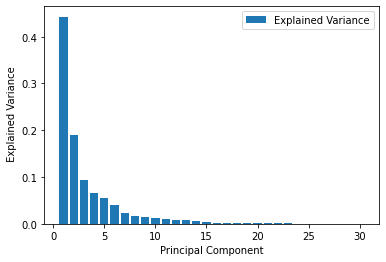

In [27]:
plt.bar(range(1,31), exp_var,label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel(' Explained Variance')
plt.legend();

## Construction of projection matrix

In [28]:
eigen_pair=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]
eigen_pair

[(13.304990794374545,
  array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
         0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
         0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
         0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
         0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
         0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])),
 (5.701374603726137,
  array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
          0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
         -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
          0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
         -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
          0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])),
 (2.8229101550062294,
  array([-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919

In [29]:
# Taking only 2 dimension

w=np.hstack((eigen_pair[0][1][:,np.newaxis],
            eigen_pair[1][1][:,np.newaxis]))

In [30]:
w

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136],
       [ 0.22099499, -0.23107671],
       [ 0.14258969,  0.18611302],
       [ 0.23928535,  0.15189161],
       [ 0.25840048,  0.06016536],
       [ 0.26085376, -0.0347675 ],
       [ 0.13816696,  0.19034877],
       [ 0.06436335,  0.36657547],
       [ 0.20597878, -0.10555215],
       [ 0.01742803,  0.08997968],
       [ 0.21132592, -0.08945723],
       [ 0.20286964, -0.15229263],
       [ 0.01453145,  0.20443045],
       [ 0.17039345,  0.2327159 ],
       [ 0.15358979,  0.19720728],
       [ 0.1834174 ,  0.13032156],
       [ 0.04249842,  0.183848  ],
       [ 0.10256832,  0.28009203],
       [ 0.22799663, -0.21986638],
       [ 0.10446933, -0.0454673 ],
       [ 0.23663968, -0.19987843],
       [ 0.22487053, -0.21935186],
       [ 0.12795256,  0.17230435],
       [ 0.21009588,  0.14359317],
       [ 0.22876753,  0.09796411],
       [ 0.25088597, -0.00825724],
       [ 0.12290456,

In [31]:
w.shape

(30, 2)

## Transforming 30 dimension data to 2 dimension

In [32]:
X_scaled.shape

(569, 30)

In [33]:
w.shape

(30, 2)

In [34]:
new_X=X_scaled.dot(w)
new_X

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [35]:
new_X.shape

(569, 2)

## Visualising the projected data

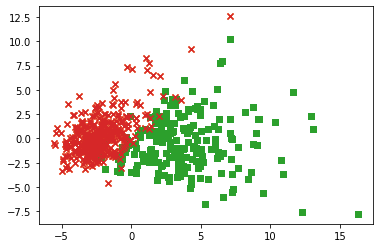

In [36]:
for l in np.unique(y):
    plt.scatter(new_X[y==1,0], new_X[y==1,1],marker='s')
    plt.scatter(new_X[y==0,0], new_X[y==0,1],marker='x')

## Using Sklearn

In [37]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X_scaled)

In [37]:
pca.components_.T[:,1]

array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
        0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
       -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
        0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
       -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
        0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])

In [38]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

# Linear Discriminant Analysis

## Preprocessing

In [39]:
X.shape

(569, 30)

In [40]:
y.unique()

array([1, 0])

In [41]:
X_scaled # Taking standardised values that we found out earlier

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Building LDA Model

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
lda=LinearDiscriminantAnalysis(n_components=1)

In [44]:
type(lda)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

## Transforming the data

In [45]:
X_lda=lda.fit_transform(X_scaled,y)

In [46]:
X_lda

array([[ 3.32392717e+00],
       [ 2.31910801e+00],
       [ 3.74742484e+00],
       [ 4.04854946e+00],
       [ 2.28115767e+00],
       [ 1.61150348e+00],
       [ 2.35653128e+00],
       [ 1.28122316e+00],
       [ 1.60828074e+00],
       [ 3.86266690e+00],
       [ 8.64980964e-01],
       [ 2.39981887e+00],
       [ 1.32670638e+00],
       [ 4.20145181e-01],
       [ 1.25084871e+00],
       [ 3.06625368e+00],
       [ 2.11049829e+00],
       [ 3.17780841e+00],
       [ 3.43796946e+00],
       [-2.23125867e-01],
       [-1.97973275e+00],
       [-2.46635453e+00],
       [ 1.79100127e+00],
       [ 3.02554197e+00],
       [ 3.87178737e+00],
       [ 3.99524140e+00],
       [ 2.74537482e+00],
       [ 2.57652189e+00],
       [ 3.07566630e+00],
       [ 8.02258881e-01],
       [ 3.41613522e+00],
       [ 2.67943316e+00],
       [ 3.63987363e+00],
       [ 3.07550539e+00],
       [ 2.68840028e+00],
       [ 2.57312945e+00],
       [ 1.07380321e+00],
       [-1.87492316e+00],
       [-4.9

In [118]:
X_lda.shape

(569, 1)

## Visualisation of the data

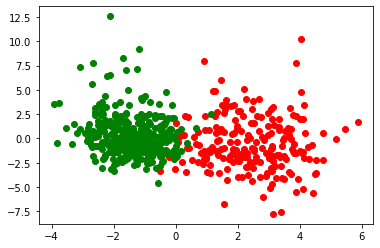

In [47]:
plt.scatter(X_lda[y==1,0], new_X[y==1,1],color='red')
plt.scatter(X_lda[y==0,0], new_X[y==0,1],color='green');

## Locally Linear Embedding

In [48]:
from sklearn.manifold import LocallyLinearEmbedding

In [49]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard')
X_lle = lle.fit_transform(X_scaled)

In [50]:
X_lle

array([[-0.05362163, -0.04909803],
       [ 0.01773839,  0.01592079],
       [ 0.02192075, -0.01696406],
       ...,
       [ 0.00619216, -0.00860985],
       [ 0.12592055, -0.07264566],
       [-0.02952142,  0.00667204]])

In [51]:
X_lle.shape

(569, 2)

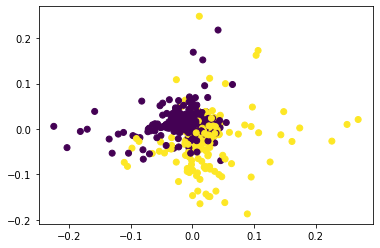

In [52]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

In [51]:
# Trying it out for different n_neighbors values

In [53]:
lle = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='standard')
X_lle = lle.fit_transform(X_scaled)

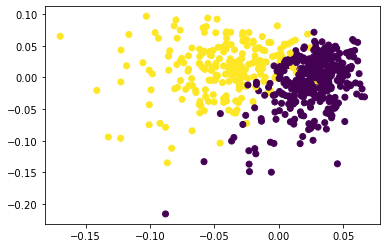

In [54]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

In [55]:
lle = LocallyLinearEmbedding(n_neighbors=260, n_components=2, method='standard')
X_lle = lle.fit_transform(X_scaled)

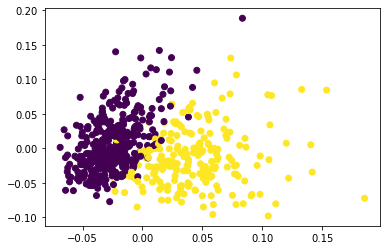

In [56]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

In [57]:
lle = LocallyLinearEmbedding(n_neighbors=460, n_components=2, method='standard')
X_lle = lle.fit_transform(X_scaled)

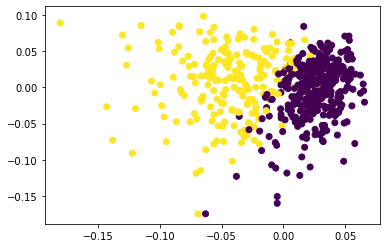

In [58]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

In [59]:
lle = LocallyLinearEmbedding(n_neighbors=350, n_components=2, method='standard')
X_lle = lle.fit_transform(X_scaled)

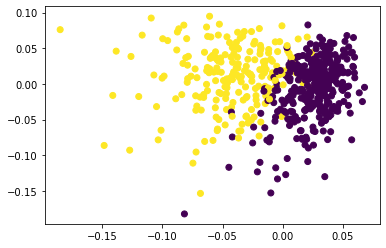

In [60]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

### Best embedding is being done for n_neighbors=100, since points are forming proper clusters

In [110]:
lle = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='standard')
X_lle = lle.fit_transform(X_scaled)

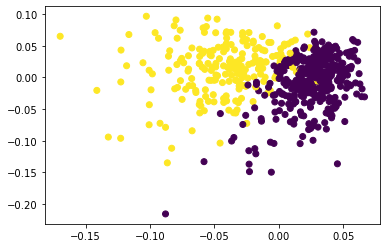

In [111]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

# Hierarchial Clustering

In [63]:
import scipy.cluster.hierarchy as sch

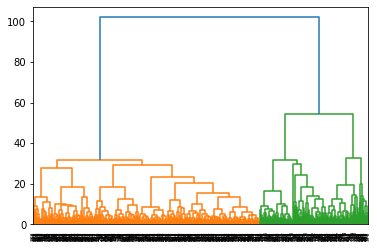

In [64]:
dendro=sch.dendrogram(sch.linkage(X_scaled,method='ward'))

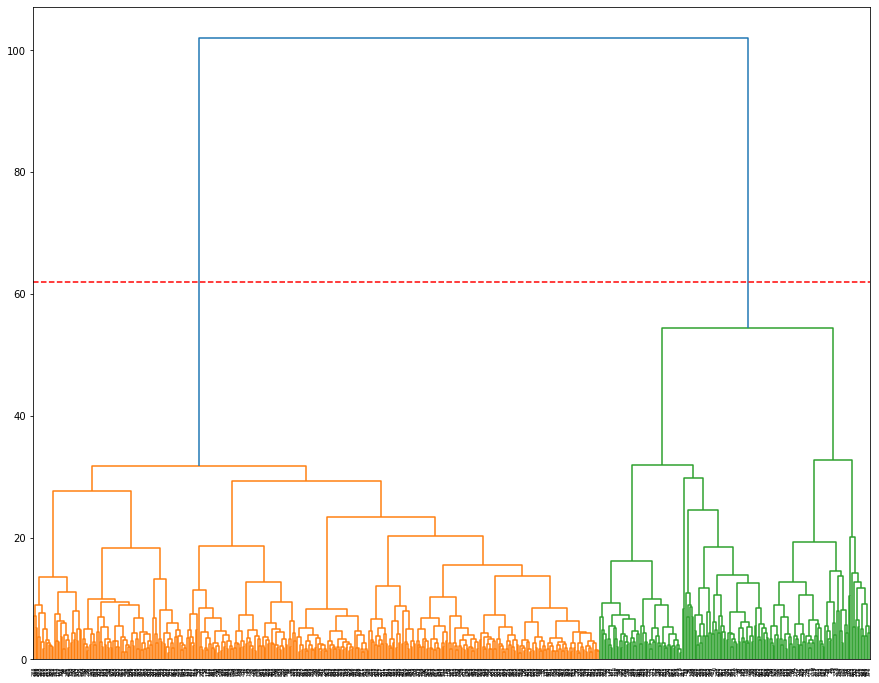

In [65]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(X_scaled,method='ward'))
plt.axhline(y=62,color='red',linestyle='--');

# Agglomerative Clustering

In [68]:
from sklearn.cluster import AgglomerativeClustering

clust=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [69]:
type(clust)

sklearn.cluster._agglomerative.AgglomerativeClustering

In [70]:
clust.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [71]:
clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

## Adding labels to DF

In [72]:
X['Label']=pd.Series(clust.labels_)

In [73]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Analysing the segments

In [74]:
# No of patients in each segment

X['Label'].value_counts()

1    385
0    184
Name: Label, dtype: int64

In [75]:
# Listing all patients belong to the segment '0'
X[X['Label']==0]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [76]:
X[X['Label']==1]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.80,1150.0,0.11810,0.15510,0.1459,0.09975,0.2948,0.08452,1
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.50,1299.0,0.13960,0.56090,0.3965,0.18100,0.3792,0.10480,1
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.00,876.5,0.11310,0.19240,0.2322,0.11190,0.2809,0.06287,1
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,30.88,123.40,1138.0,0.14640,0.18710,0.2914,0.16090,0.3029,0.08216,1
19,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.2390,0.12880,0.2977,0.07259,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004,1
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1


In [77]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)


C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 38.912196
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.427509
[t-SNE] KL divergence after 1900 iterations: 0.212868


In [78]:
X_num=X.to_numpy()

## K-Means Clustering 

0.697264256635999

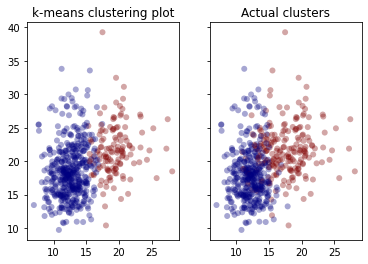

In [147]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X_num[:,0],X_num[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(X_num[:,0],X_num[:,1],  c = cd['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

from sklearn.metrics import silhouette_score
silhouette_score(X, kY)

In [148]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X, kY)
ch_score

1300.207545364549

In [149]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X, kY)
db_score

0.5044038226580059

In [150]:
from sklearn.metrics import adjusted_rand_score
ri_score = adjusted_rand_score(cd['diagnosis'], kY)
ri_score

0.49142453622455523

0.6899793216231829

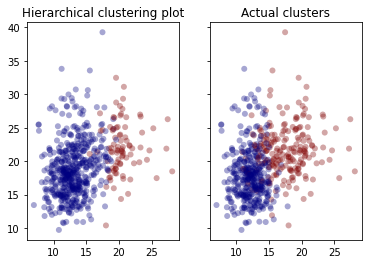

In [151]:
# Cluster using hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters=2, linkage='ward')
kt = aggC.fit_predict(X)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(X_num[:,0],X_num[:,1],  c=kt, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Hierarchical clustering plot')

ax2.scatter(X_num[:,0],X_num[:,1],  c = cd['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

from sklearn.metrics import silhouette_score
silhouette_score(X, kt)

In [152]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X, kt)
ch_score

1088.1616346604114

In [153]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X, kt)
db_score

0.4794641983637732

In [154]:
from sklearn.metrics import adjusted_rand_score
ri_score = adjusted_rand_score(cd['diagnosis'], kt)
ri_score

0.2872456066095377

## Gaussian Mixture Model

0.6284866242015577

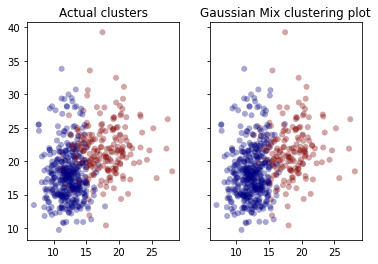

In [155]:
#GMM

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, covariance_type="full")
gm_pred = gm.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X_num[:,0], X_num[:,1], c=cd["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X_num[:,0], X_num[:,1], c=gm_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Gaussian Mix clustering plot")

from sklearn.metrics import silhouette_score
silhouette_score(X, gm_pred)

In [156]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X, gm_pred)
ch_score

982.0803455982226

In [157]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X, gm_pred)
db_score

0.59045610987208

In [158]:
from sklearn.metrics import adjusted_rand_score
ri_score = adjusted_rand_score(cd['diagnosis'], gm_pred)
ri_score

0.6814667090961611

In [94]:
n_components=np.arange(1,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(X)
    aic_score=model.aic(X)
    bic_score=model.bic(X)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memor

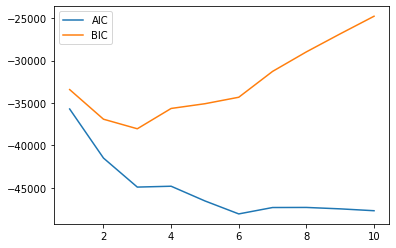

In [95]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();